In [2]:
import sys
import os 
sys.path.append(os.path.abspath('..'))

In [3]:
from environments.grid_world import GridworldEnv
from algorithms.value_iteration import value_iteration
import matplotlib.pyplot as plt
import numpy as np

Initial state (row,col): (0, 0)
Initial state index: 0
Goal: [(3, 3), (0, 0)] Goal index: [15, 0]


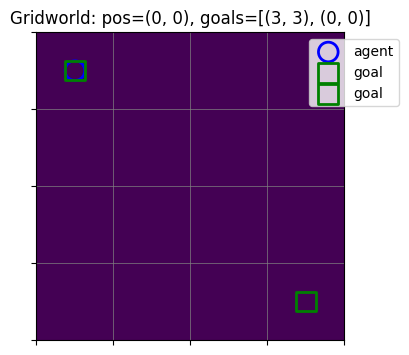

<Axes: title={'center': 'Gridworld: pos=(0, 0), goals=[(3, 3), (0, 0)]'}>

In [4]:
# Cell 3: create env and render initial state
env = GridworldEnv(width=4, height=4, start=(0,0), goals=[(3,3), (0, 0)],
                   step_reward=-1, goal_reward=-1, seed=123)

# Reset and print a few pieces of information
init_state = env.reset()
print("Initial state (row,col):", init_state)
print("Initial state index:", env.state_to_index(init_state))
print("Goal:", env.goals, "Goal index:", [env.state_to_index(goal) for goal in env.goals])

# Render to inspect visually
env.render()

In [5]:
policy, Vs = value_iteration(env)

In [6]:
def plot_policy_values_colormap(env, policy, Vs, title="Policy and Value Function"):
    # Map action indices to direction vectors (adjust if your env uses different order)
    action_to_arrow = env.ACTIONS

    plt.figure(figsize=(env.width, env.height))
    plt.title(title)

    # Create value heatmap
    im = plt.imshow(Vs, cmap='viridis', origin='upper')

    # Annotate each cell with its value and arrow
    for r in range(env.height):
        for c in range(env.width):
            state_index = env.state_to_index((r, c))
            val = Vs[r, c]
            plt.text(c, r, f"{val:.2f}", ha='center', va='center', color='black', fontsize=9)

            if state_index in policy and policy[state_index] is not None:
                action = policy[state_index]
                dx, dy = action_to_arrow[action]
                plt.arrow(
                    c, r, 
                    0.25 * dy, 0.25 * dx, 
                    head_width=0.15, head_length=0.15, fc='black', ec='black'
                )

    # Mark goal cells
    for goal in env.goals:
        plt.scatter(goal[1], goal[0], color='green', s=150, marker='*', label='Goal')

    # Adjust axes and grid
    plt.xticks(np.arange(env.width))
    plt.yticks(np.arange(env.height))
    plt.xlim(-0.5, env.width - 0.5)
    plt.ylim(env.height - 0.5, -0.5)

    # Colorbar for values
    plt.colorbar(im, fraction=0.046, pad=0.04, label="State Value")

    plt.tight_layout()
    plt.show()


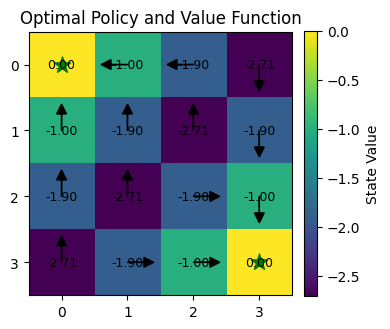

In [7]:
plot_policy_values_colormap(env, policy, Vs, title="Optimal Policy and Value Function")